<a href="https://colab.research.google.com/github/prab-tri/demo/blob/master/ICP09_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ICP09  - Big Data Analytics**

Topic  - Linear Regression

Created by - Prabhanjan Trivedi

Data

Using the advertising dataset. It is downloaded from kaggle.com.

Analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.


In [1]:
#importing all required libraries 
import pandas as pd
import numpy as np
from google.colab import files
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
#ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
#uploading the file from local drive to goggle colab
uploaded = files.upload()

Saving advertising.csv to advertising (1).csv


In [3]:
#Reading the file and showing first 5 reocrds
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In this dataset, we have four columns. First three columns are budget spent for 3 different marketing type for advertisment and last column is sales. Sales is dependent variable here and rest columns are independent variable. We have to predict sales in this scenario using linear regression model.
 

In [4]:
#shape of dataset
data.shape

(200, 4)

No of rows = 200

No of columns = 4

In [5]:
#basic info on data
data.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [6]:
#Statitical information on numercial columns
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
#Checking Null values
data.isnull().sum()*100/data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

There is no rows with null value.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


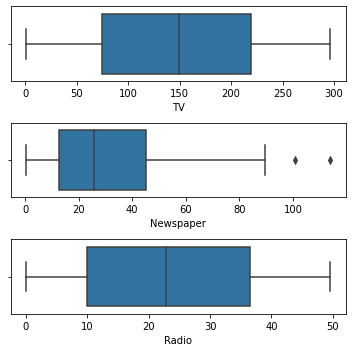

In [8]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

There is no cosiderable outliners data.



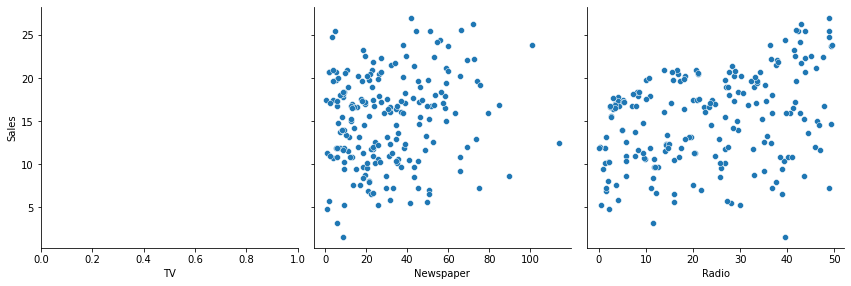

In [9]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [10]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

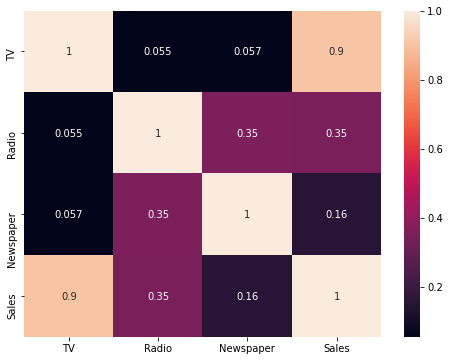

In [11]:
#Plotting correelation heat map
corr = data.corr(method = 'pearson')
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
data.columns

We can see that there is correlation of 0.9 between 'TV' and Sales.
So these two columns are highly positive correlated. Radio and Sales has correlation of 0.35 and Newspaper and Sales has just correlation of 0.16.
It means change in TV columns has major positively impact on Sales columns.

**So We are going to plot the linear model using 'TV' as feature and 'Sales' as output.**  

In [12]:
#Taking dependent and independent variable separate
#changing X as 2-D matrix 
X = np.array(data['TV']).reshape((-1, 1))
y = data['Sales']

In [13]:
#defining the model
model = LinearRegression()

In [14]:
#Fitting the model with data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#printing the intercept and slope of the model
print('Intercept of the model : ', model.intercept_)
print('Slope of the model : ', model.coef_[0])

Intercept of the model :  6.974821488229891
Slope of the model :  0.055464770469558874


We can write the linear model as follows:

Sales = 0.055546477 X TV + 6.974821488229891

In [16]:
#predicted value of y -- Predicted sales value from model
y_pred = model.predict(X)

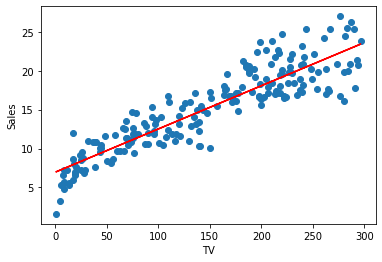

In [17]:
#Plotting regression line 
plt.scatter(X, y)
plt.plot(X, y_pred, 'r')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

We have positive slope and positive intercept which can be seen in above plot.

In [18]:
#Calculating the r squared 
r_sq = model.score(X, y)

In [19]:
print('R squared of the model : ', r_sq)

R squared of the model :  0.8121757029987413


**R Squared**

Meaning that 81.22% of the variance in Sales is explained by TV.

In [20]:
#Calculating Mean squared error using the library
MSE = mean_squared_error(y, y_pred)

In [21]:
print('MSE calulated using library: ', MSE)

MSE calulated using library:  5.2177438977951285


In [22]:
# Mean Squared Error (MSE) and Sum Squared Error (SSE) using mathematical terms
SSE = np.square(np.subtract(y,y_pred)).sum()
MSE1 = np.square(np.subtract(y,y_pred)).mean() 

In [23]:
print('SSE using mathematical calculation: ', SSE)
print('MSE using mathematical calculation: ', MSE1)

SSE using mathematical calculation:  1043.5487795590257
MSE using mathematical calculation:  5.2177438977951285


As we can see, Both MSE is same. 